# Organizing, formatting, and mapping for GEO count files
- Organize by strain (630, R20291) and study
- Uniform data structure: patricID, geneName, counts (raw v normalized?), etc (same for every study
- Map gene IDs to PATRIC IDs

In [2]:
# Load libraries
import pandas as pd
import cobra
from riptide import *

In [4]:
# Load models
model = cobra.io.read_sbml_model("models/iCdG709.sbml")

Set parameter Username
Academic license - for non-commercial use only - expires 2023-04-21


https://identifiers.org/seed.reaction/ does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id


# 630
### 1.  <a href="https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE173804GSE173804">GSE173804<a> 
- 630 grown in BHIS in anaerobic and microaerobic conditions, 3 replicates each
- RNA-seq, Illumina NovaSeq 6000
- Paper:
<a href="https://doi.org/10.1099/mgen.0.000738">Clostridioides difficile strain-dependent and strain-independent adaptations to a microaerobic environment</a>

In [5]:
# Read in count file
gse173804=pd.read_excel("../data/counts/GSE173804_CD630_raw_data.xlsx")
gse173804.head()

# TO DO:
## Rename count columns (shorter, human readable)
## Choose count format (total, rpkm, tpm, cpm)
## Add patric IDs

,Name,Chromosome,Region,Identifier,2691-AW-34-GAATCACC-GAACGAAG_S01_L001_R1_001 - Total counts,2691-AW-34-GAATCACC-GAACGAAG_S01_L001_R1_001 - RPKM,2691-AW-34-GAATCACC-GAACGAAG_S01_L001_R1_001 - TPM,2691-AW-34-GAATCACC-GAACGAAG_S01_L001_R1_001 - CPM,2691-AW-33-ATAACGCC-CAGGTTCA_S01_L001_R1_001 - Total counts,2691-AW-33-ATAACGCC-CAGGTTCA_S01_L001_R1_001 - RPKM,...,2691-AW-36-GATCTTGC-CATGAGCA_S01_L001_R1_001 TPM,2691-AW-36-GATCTTGC-CATGAGCA_S01_L001_R1_001 CPM,2691-AW-37-CAATGCGA-GACGAACT_S01_L001_R1_001 - Total counts,2691-AW-37-CAATGCGA-GACGAACT_S01_L001_R1_001 - RPKM,2691-AW-37-CAATGCGA-GACGAACT_S01_L001_R1_001 - TPM,2691-AW-37-CAATGCGA-GACGAACT_S01_L001_R1_001 - CPM,2691-AW-38-GGTGTACA-AGACGCTA_S01_L001_R1_001 - Total counts,2691-AW-38-GGTGTACA-AGACGCTA_S01_L001_R1_001 - RPKM,2691-AW-38-GGTGTACA-AGACGCTA_S01_L001_R1_001 - TPM,2691-AW-38-GGTGTACA-AGACGCTA_S01_L001_R1_001 - CPM
0,dnaA,NC_009089_Cdif_630,1..1320,4913287,3836,428.632371,471.882159,658.755646,4996,429.710656,...,365.866112,520.153371,2838,300.439998,336.473815,450.053321,3816,280.543152,312.192415,421.665630
1,dnaN,NC_009089_Cdif_630,1562..2668,4916178,1846,245.959938,270.777744,317.013275,2337,239.683819,...,179.134342,213.580586,1283,161.956479,181.381024,203.459623,1849,162.089368,180.375357,204.313352
2,CD630_00030,NC_009089_Cdif_630,2805..3011,4916179,225,160.321760,176.498518,38.639213,351,192.514921,...,105.055277,23.421975,190,128.263340,143.646837,30.130420,246,115.326736,128.337234,27.182847
3,recF,NC_009089_Cdif_630,3029..4144,4916180,1137,150.271482,165.434148,195.256822,1457,148.225520,...,100.131335,120.356487,878,109.938451,123.124118,139.234255,1209,105.130164,116.990344,133.593749
4,gyrB,NC_009089_Cdif_630,4145..6046,4915789,2718,210.775068,232.042657,466.761691,4186,249.871277,...,214.179284,438.756210,3241,238.115578,266.674403,513.961527,4007,204.443858,227.508037,442.771011


In [7]:
#metadata to rename columns
metadata = pd.read_table("../data/counts/GSE173804_series_matrix.txt",skiprows=34).transpose()
metadata.columns=metadata.iloc[0]
metadata['!Sample_description']

!Sample_title,!Sample_description,!Sample_description
!Sample_title,!Sample_description,!Sample_description
196_anaerobic_1,196_ microaerobic_vs_aerobic,2691-AW-27-CAGGTTCA-ATAACGCC_S01_L001_R1_001
196_anaerobic_2,196_ microaerobic_vs_aerobic,2691-AW-28-GAACGAAG-GAATCACC_S01_L001_R1_001
196_anaerobic_3,196_ microaerobic_vs_aerobic,2691-AW-29-CTCAGAAG-GGCAAGTT_S01_L001_R1_001
196_microaerobic_1,196_ microaerobic_vs_aerobic,2691-AW-30-CATGAGCA-GATCTTGC_S01_L001_R1_001
196_microaerobic_2,196_ microaerobic_vs_aerobic,2691-AW-31-GACGAACT-CAATGCGA_S01_L001_R1_001
196_microaerobic_3,196_ microaerobic_vs_aerobic,2691-AW-32-AGACGCTA-GGTGTACA_S01_L001_R1_001
CD630_anaerobic_1,630_ microaerobic_vs_aerobic,2691-AW-33-ATAACGCC-CAGGTTCA_S01_L001_R1_001
CD630_anaerobic_2,630_ microaerobic_vs_aerobic,2691-AW-34-GAATCACC-GAACGAAG_S01_L001_R1_001
CD630_anaerobic_3,630_ microaerobic_vs_aerobic,2691-AW-35-GGCAAGTT-CTCAGAAG_S01_L001_R1_001


In [8]:
# New column names based on metadata
newcolumns = ['Name', 'Chromosome', 'Region', 'Source','CD630_anaerobic_2_totalCounts',
'CD630_anaerobic_2_RPKM',
'CD630_anaerobic_2_TPM',
'CD630_anaerobic_2_CPM',
'CD630_anaerobic_1_totalCounts',
'CD630_anaerobic_1_RPKM',
'CD630_anaerobic_1_TPM',
'CD630_anaerobic_1_CPM',
'CD630_anaerobic_3_totalCounts',
'CD630_anaerobic_3_RPKM',
'CD630_anaerobic_3_TPM',
'CD630_anaerobic_3_CPM',
'CD630_microaerobic_1_totalCounts',
'CD630_microaerobic_1_RPKM',
'CD630_microaerobic_1_TPM',
'CD630_microaerobic_1_CPM',
'CD630_microaerobic_2_totalCounts',
'CD630_microaerobic_2_RPKM',
'CD630_microaerobic_2_TPM',
'CD630_microaerobic_2_CPM',
'CD630_microaerobic_3_totalCounts',
'CD630_microaerobic_3_RPKM',
'CD630_microaerobic_3_TPM',
'CD630_microaerobic_3_CPM']

In [9]:
# Reset column names
gse173804.columns = newcolumns

#### Get toxin genes

In [10]:
toxNames = ['tcdA', 'tcdB', 'tcdD', 'tcdE', 'tcdR','tcdC']
toxID1 = [4914073,4914074,4914075,4914076,4914077]
toxID2 = ['CD6590', 'CD06600', 'CD06610', 'CD06630', 'CD06640']
toxID3 = ['CD630_06590', 'CD630_06600', 'CD630_06610', 'CD630_06630', 'CD630_06640']

In [11]:
geneID_nameDict = dict(zip(gse173804.loc[gse173804['Name'].isin(toxNames), 'Source'],gse173804.loc[gse173804['Name'].isin(toxNames), 'Name']))
#{4914073: 'tcdR',
# 4914074: 'tcdB',
# 4914075: 'tcdE',
# 4914076: 'tcdA',
# 4914077: 'tcdC'}

In [12]:
columns = ['CD630_anaerobic_1_totalCounts', 'CD630_anaerobic_2_totalCounts','CD630_anaerobic_3_totalCounts','CD630_microaerobic_1_totalCounts','CD630_microaerobic_2_totalCounts','CD630_microaerobic_3_totalCounts']

In [13]:
# rpm calculation
rpm = (gse173804[columns]/gse173804[columns].sum())*1E6
rpm = rpm.join(gse173804['Source']).transpose()
rpm.columns=rpm.loc['Source'].tolist()
rpm = rpm.drop('Source')

In [14]:
r630toxRPM = rpm[toxID1].rename(columns=geneID_nameDict)

In [15]:
# Normalize rpm for toxin genes
rpm=(rpm[toxID1]-rpm.min().min())/(rpm.max().max()-rpm.min().min())

In [16]:
r630tox = rpm.rename(columns=geneID_nameDict)

#### Back to patric ID mapping

In [229]:
# Load patric ID map data
patric = pd.read_csv('../data/counts/GSE173804_PATRIC_id_mapping.csv')
#patric.head()

In [230]:
# Merge patricIDs with gse173804 df
gse173804 = pd.merge(patric.iloc[:,0:2], gse173804, how='outer', on='Source')
gse173804 = gse173804.rename(columns={'Target':'patricID'})
gse173804 = gse173804.dropna()

In [236]:
# Parse patric IDs to model-readable format
for i in gse173804['patricID']:
    g = i.replace('fig|', '')
    gse173804.loc[gse173804['patricID']==i, 'patricID']=g

In [240]:
# Filter to include only genes included in 630 model (take intersection of gene sets?)
keep = []
for x in gse173804['patricID']:
    try:
        model.genes.get_by_id(x)
        keep.append(gse173804.loc[gse173804['patricID']==x].index[0])
    except KeyError:
        print(x, "is not in the model")

gse173804=gse173804.iloc[keep,:].drop_duplicates()

272563.8.peg.9 is not in the model
272563.8.peg.10 is not in the model
272563.8.peg.11 is not in the model
272563.8.peg.12 is not in the model
272563.8.peg.13 is not in the model
272563.8.peg.14 is not in the model
272563.8.peg.15 is not in the model
272563.8.peg.16 is not in the model
272563.8.peg.17 is not in the model
272563.8.peg.18 is not in the model
272563.8.peg.19 is not in the model
272563.8.rna.3 is not in the model
272563.8.peg.20 is not in the model
272563.8.peg.21 is not in the model
272563.8.peg.23 is not in the model
272563.8.peg.24 is not in the model
272563.8.peg.25 is not in the model
272563.8.peg.26 is not in the model
272563.8.peg.28 is not in the model
272563.8.rna.7 is not in the model
272563.8.rna.10 is not in the model
272563.8.rna.30 is not in the model
272563.8.peg.29 is not in the model
272563.8.peg.30 is not in the model
272563.8.peg.31 is not in the model
272563.8.peg.32 is not in the model
272563.8.peg.33 is not in the model
272563.8.peg.34 is not in the m

In [246]:
# Save counts file (raw counts!!)
gse173804[['patricID','CD630_anaerobic_1_totalCounts','CD630_anaerobic_2_totalCounts','CD630_anaerobic_3_totalCounts']].to_csv('../data/counts/gse173804_anaerobic.tsv',sep='\t',header=False, index=False)
gse173804[['patricID','CD630_microaerobic_1_totalCounts','CD630_microaerobic_2_totalCounts','CD630_microaerobic_3_totalCounts']].to_csv('../data/counts/gse173804_microaerobic.tsv',sep='\t',header=False, index=False)

### 2. GSE165116
- 630 grown in BHIS, +120 uM DCA, +240 uM DCA at 9h, 14h, 24h, & 48h 3 replicates each (36 samples total)
- RNA-seq, single end reads, Illumina HiSeq 2500

In [18]:
# Read in count file
gse165116=pd.read_csv('../data/counts/GSE165116_Res_normalized-counts.csv')
#gse165116.head()

# TO DO:
## Split refLocus IDs and names into two columns
## Parse RefLocus IDs into patric readable format
## Add patric IDs

In [19]:
# Split columns
gse165116[['refLoc','name']]=gse165116['Unnamed: 0'].str.split('|', expand=True)

In [20]:
# Edit RefSeq-Locus ID format
gse165116['Source']=''
for i in gse165116['refLoc']:
    g = i[:2] + i[6:-1]
    gse165116.loc[gse165116['refLoc']==i, 'Source']=g

In [21]:
gse165116.head()

,Unnamed: 0,9H-BHISG-1,9H-BHISG-2,9H-BHISG-3,H14-BHISG-1,H14-BHISG-2,H14-BHISG-3,H24-BHISG-1,H24-BHISG-2,H24-BHISG-3,...,H14-D240-3,H24-D240-1,H24-D240-2,H24-D240-3,H48-D240-1,H48-D240-2,H48-D240-3,refLoc,name,Source
0,CD630_00010|dnaA,407.650379,309.264053,860.100239,332.440988,128.408645,122.555579,288.793672,182.192314,134.990300,...,894.993210,439.708582,570.221632,540.457548,1232.063772,1578.198478,1502.725485,CD630_00010,dnaA,CD0001
1,CD630_00020|dnaN,90.019743,83.555551,332.179008,88.198629,16.568857,52.523820,46.673725,0.000000,32.924463,...,308.511389,128.382068,174.385240,117.594060,403.384414,267.531633,598.853390,CD630_00020,dnaN,CD0002
2,CD630_00030,27.079110,23.873015,79.530991,44.099315,8.284429,0.000000,35.005294,13.013737,32.924463,...,97.587903,42.526560,75.426142,58.203121,169.979596,197.671741,233.847674,CD630_00030,None,CD0003
3,CD630_00040|recF,82.701064,93.321784,181.344371,98.375394,82.844287,70.031760,58.342156,39.041210,46.094249,...,162.487437,110.729534,162.317057,122.345335,368.096926,234.189412,480.573915,CD630_00040,recF,CD0004
4,CD630_00050|gyrB,85.628536,92.236647,413.766835,437.600893,207.110718,455.206437,399.643768,351.370891,269.980600,...,682.160914,410.020229,223.261380,254.193220,1081.688336,1233.662191,1583.724897,CD630_00050,gyrB,CD0005


#### Get toxin genes

In [22]:
toxID2=gse165116.loc[gse165116['name'].isin(toxNames), 'refLoc'].tolist()

In [23]:
refLocus_nameDict = dict(zip(gse165116.loc[gse165116['name'].isin(toxNames), 'refLoc'],gse165116.loc[gse165116['name'].isin(toxNames), 'name']))
#{'CD630_06590': 'tcdR',
# 'CD630_06600': 'tcdB',
# 'CD630_06610': 'tcdE',
# 'CD630_06630': 'tcdA',
# 'CD630_06640': 'tcdC'}

In [24]:
columns = ['9H-BHISG-1', '9H-BHISG-2','9H-BHISG-3',
'9H-D120-1', '9H-D120-2', '9H-D120-3',
'9H-D240-1','9H-D240-2', '9H-D240-3']

In [25]:
# rpm calculation
#rpm = (gse173804[columns]/gse173804[columns].sum())*1E6 # already rpkm normalized
rpm = gse165116[columns]
rpm = rpm.join(gse165116['refLoc']).transpose()
rpm.columns=rpm.loc['refLoc'].tolist()
rpm = rpm.drop('refLoc')

In [26]:
r630toxRPM = pd.concat([r630toxRPM, rpm[toxID3].rename(columns=refLocus_nameDict)])

In [27]:
# Normalize rpm for toxin genes
rpm=(rpm[toxID2]-rpm.min().min())/(rpm.max().max()-rpm.min().min())

In [28]:
r630tox = pd.concat([r630tox, rpm.rename(columns=refLocus_nameDict)])

#### Back to patric ID mapping

In [290]:
# Load patric ID mapping file
patric = pd.read_csv("../data/counts/gse165116_PATRIC_id_mapping.csv")
# Filter out delta erm results
patric = patric[patric['PATRIC ID'].str.contains('1496')==False]

In [294]:
# Merge patricIDs with gse165116 df
gse165116 = pd.merge(patric.iloc[:,0:2], gse165116, how='outer', on='Source')
gse165116 = gse165116.rename(columns={'Target':'patricID'})
gse165116 = gse165116.dropna()

In [296]:
# Convert patric ID to model readable format
for i in gse165116['patricID']:
    g = i.replace('fig|', '')
    gse165116.loc[gse165116['patricID']==i, 'patricID']=g

In [300]:
# Filter to include only genes included in 630 model (take intersection of gene sets?)
keep = []
for x in gse165116['patricID']:
    try:
        model.genes.get_by_id(x)
        keep.append(x)
    except KeyError:
        print(x, "is not in the model")

272563.8.peg.9 is not in the model
272563.8.peg.10 is not in the model
272563.8.peg.12 is not in the model
272563.8.peg.13 is not in the model
272563.8.peg.14 is not in the model
272563.8.peg.17 is not in the model
272563.8.peg.18 is not in the model
272563.8.peg.19 is not in the model
272563.8.peg.23 is not in the model
272563.8.peg.24 is not in the model
272563.8.peg.26 is not in the model
272563.8.peg.30 is not in the model
272563.8.peg.31 is not in the model
272563.8.peg.32 is not in the model
272563.8.peg.33 is not in the model
272563.8.peg.34 is not in the model
272563.8.peg.35 is not in the model
272563.8.peg.36 is not in the model
272563.8.peg.37 is not in the model
272563.8.peg.59 is not in the model
272563.8.peg.63 is not in the model
272563.8.peg.64 is not in the model
272563.8.peg.67 is not in the model
272563.8.peg.68 is not in the model
272563.8.peg.68 is not in the model
272563.8.peg.70 is not in the model
272563.8.peg.71 is not in the model
272563.8.peg.72 is not in the

In [305]:
gse165116=gse165116.loc[gse165116['patricID'].isin(keep)]

In [307]:
#Save count files
gse165116[['patricID','9H-BHISG-1', '9H-BHISG-2','9H-BHISG-3',]].to_csv('../data/counts/gse165116_bhis9h.tsv', sep='\t',header=False,index=False)
gse165116[['patricID','9H-D120-1', '9H-D120-2', '9H-D120-3']].to_csv('../data/counts/gse165116_D1209h.tsv', sep='\t',header=False,index=False)
gse165116[['patricID','9H-D240-1','9H-D240-2', '9H-D240-3',]].to_csv('../data/counts/gse165116_D2409h.tsv', sep='\t',header=False,index=False)

### 3. GSE120189
- 630 grown in low (11 mg/L) and high (77 mg/L) iron conditions, collected at mid-exponential phase
- RNA-seq, Illumina HiSeq 2500
- Paper: <a href="https://pubmed.ncbi.nlm.nih.gov/30619231/">Iron Regulation in Clostridioides difficile<a>

In [30]:
gse120189List=["GSM3395700_WT_minus_1.txt",
"GSM3395701_WT_minus_2.txt",
"GSM3395702_WT_minus_3.txt",
"GSM3395703_WT_plus_1.txt",
"GSM3395704_WT_plus_2.txt",
"GSM3395705_WT_plus_3.txt"]

In [31]:
# Read in count files and save to one df
gse120189=pd.DataFrame(pd.read_table("../data/counts/GSE120189_RAW/GSM3395700_WT_minus_1.txt")['locus'])
for i in gse120189List:
    f = pd.read_table("../data/counts/GSE120189_RAW/%s" %i)
    gse120189 = pd.merge(f.rename(columns={'RPKM':i.split(".")[0] + "_RPKM"}), gse120189,how='outer', on='locus')

#TO DO:
## Add patricIDs

In [32]:
gse120189.head()

,locus,GSM3395705_WT_plus_3_RPKM,GSM3395704_WT_plus_2_RPKM,GSM3395703_WT_plus_1_RPKM,GSM3395702_WT_minus_3_RPKM,GSM3395701_WT_minus_2_RPKM,GSM3395700_WT_minus_1_RPKM
0,CD630_00010,114.269178,119.085904,169.860339,403.794689,371.038679,281.080364
1,CD630_00020,10.963121,25.706797,9.683354,233.994947,196.826146,161.904899
2,CD630_00030,0.000000,0.000000,0.000000,32.086264,84.665008,78.933451
3,CD630_00040,6.214119,11.535481,12.006578,172.593047,173.380577,166.680812
4,CD630_00050,30.080650,29.923685,29.118793,366.009249,491.846023,531.292422


In [33]:
# Convert locus IDs into patric mapper readable ref locus format
gse120189['Source']=''
for i in gse120189['locus']:
    g = i[:2] + i[6:-1]
    gse120189.loc[gse120189['locus']==i, 'Source']=g

In [34]:
gse120189.columns

Index(['locus', 'GSM3395705_WT_plus_3_RPKM', 'GSM3395704_WT_plus_2_RPKM',
       'GSM3395703_WT_plus_1_RPKM', 'GSM3395702_WT_minus_3_RPKM',
       'GSM3395701_WT_minus_2_RPKM', 'GSM3395700_WT_minus_1_RPKM', 'Source'],
      dtype='object')

#### Get toxin genes

In [35]:
columns = ['GSM3395705_WT_plus_3_RPKM', 'GSM3395704_WT_plus_2_RPKM',
       'GSM3395703_WT_plus_1_RPKM', 'GSM3395702_WT_minus_3_RPKM',
       'GSM3395701_WT_minus_2_RPKM', 'GSM3395700_WT_minus_1_RPKM']

In [36]:
# rpm calculation
#rpm = (gse120189[columns]/gse120189[columns].sum())*1E6 # Already normalized
rpm=gse120189[columns]
rpm = rpm.join(gse120189['locus']).transpose()
rpm.columns=rpm.loc['locus'].tolist()
rpm = rpm.drop('locus')

In [37]:
r630toxRPM = pd.concat([r630toxRPM, rpm[toxID3].rename(columns=refLocus_nameDict)])

In [38]:
# Normalize rpm for toxin genes
rpm=(rpm[toxID2]-rpm.min().min())/(rpm.max().max()-rpm.min().min())

In [39]:
r630tox = pd.concat([r630tox, rpm.rename(columns=refLocus_nameDict)])

#### Back to patric ID mapping

In [53]:
# Save RefLoci to convert to patric ID
gse120189['RefLocus'].to_csv("../data/counts/GSE120189_RAW/reflocusID.csv")

In [97]:
# Load patric ID mapping file
patric = pd.read_table("../data/counts/GSE120189_RAW/PATRIC_id_mapping.txt")
#patric.head()

In [98]:
# Filter out delta erm results
patric = patric[patric['PATRIC ID'].str.contains('1496')==False].rename(columns = {'Source':'RefLocus'})

In [125]:
# Merge patricIDs with gse120189 df
gse120189 = pd.merge(patric.iloc[:,0:2], gse120189, how='outer', on='RefLocus')
gse120189 = gse120189.rename(columns={'Target':'patricID'})
#gse120189 = gse120189.dropna()

In [126]:
for i in gse120189['patricID']:
    g = i.replace('fig|', '')
    gse120189.loc[gse120189['patricID']==i, 'patricID']=g

In [122]:
# Filter to include only genes included in 630 model (take intersection of gene sets?)
keep = []
for x in gse120189['patricID']:
    try:
        model.genes.get_by_id(x)
        keep.append(gse120189.loc[gse120189['patricID']==x].index[0])
    except KeyError:
        print(x, "is not in the model")

In [ ]:
gse120189=gse120189.iloc[keep,:].drop_duplicates()

In [ ]:
# Save to counts file
gse120189.to_csv("../data/counts/GSE120189_counts.csv")

In [204]:
gse120189[['patricID','GSM3395705_WT_plus_3_RPKM',
       'GSM3395704_WT_plus_2_RPKM', 'GSM3395703_WT_plus_1_RPKM']].to_csv('../data/counts/gse120189_highFe_counts.tsv',sep="\t" , header=False, index=False)

In [205]:
gse120189[['patricID','GSM3395702_WT_minus_3_RPKM', 'GSM3395701_WT_minus_2_RPKM','GSM3395700_WT_minus_1_RPKM']].to_csv('../data/counts/gse120189_lowFe_counts.tsv',sep="\t" , header=False, index=False)

# R20291
### 4. GSE107961
- R20291 grown in TY and TY + 5mM Cysteine at 4h, 8h, and 12h, 2 replicates each (12 samples total)
- RNA-seq, illumina HiSeq 2500
- Paper: <a href="https://doi.org/10.1016/j.micres.2018.07.003">Time-resolved transcriptome analysis of Clostridium difficile R20291 response to cysteine<a>

In [41]:
#R20291 toxin info
toxNames = ['tcdA', 'tcdB', 'tcdD', 'tcdE', 'tcdR','tcdC']
toxID = ['CDR20291_0581', #tcdD
        'CDR20291_0582',#tcdB
        'CDR20291_0583',#tcdE
        'CDR20291_0584'] #tcdA

In [42]:
# Load R20291 model
r20291=cobra.io.read_sbml_model("models/iCdR703.sbml")

In [43]:
# Read in count files
gse107961=pd.read_excel('../data/counts/GSE107961_statistics_8_h_cys-con.xlsx',header=1)
gse107961.head()

# TO DO:
## Get patric ID map to refseq-locus IDs
## Add patric IDs
## Save raw count files

,GeneID,GeneName,8hcon1,8hcon2,8hcys1,8hcys2,8hcon1.1,8hcon2.1,8hcys1.1,8hcys2.1,logFC,logCPM,PValue,FDR
0,CDR20291_0001,NaN,170,292,521,350,3.776329,4.259411,4.656664,4.346542,0.472518,4.299123,0.068453,0.166693
1,CDR20291_0002,NaN,315,452,828,656,4.660253,4.886526,5.322436,5.248863,0.509013,5.057346,0.021720,0.067969
2,CDR20291_0003,serS1,4146,4690,6650,6718,8.372137,8.256361,8.324252,8.600967,0.153852,8.394394,0.475720,0.647870
3,CDR20291_0004,NaN,208,477,1108,507,4.065042,4.963882,5.741585,4.878506,0.791622,5.038687,0.017949,0.058403
4,CDR20291_0005,dnaH,469,914,1669,856,5.232213,5.899402,6.331511,5.631702,0.419799,5.831619,0.129829,0.268730


#### Get toxin genes

In [44]:
refLocus2_nameDict = dict(zip(gse107961.loc[gse107961['GeneName'].isin(toxNames), 'GeneID'],gse107961.loc[gse107961['GeneName'].isin(toxNames), 'GeneName']))
#{'CDR20291_0581': 'tcdD',
# 'CDR20291_0582': 'tcdB',
# 'CDR20291_0583': 'tcdE',
# 'CDR20291_0584': 'tcdA'}

In [45]:
# rpm calculation
rpm = (gse107961[['8hcon1', '8hcon2', '8hcys1', '8hcys2']]/gse107961[['8hcon1', '8hcon2', '8hcys1', '8hcys2']].sum())*1E6
rpm = rpm.join(gse107961['GeneID']).transpose()
rpm.columns=rpm.loc['GeneID'].tolist()
rpm = rpm.drop('GeneID')

In [46]:
# Save rpm counts for toxin transcripts
r20291toxRPM = rpm[toxID]

In [47]:
# Normalize rpm for toxin genes
r20291tox=(rpm[toxID]-rpm.min().min())/(rpm.max().max()-rpm.min().min())

#### Back to patric ID mapping

In [422]:
# Use RefSeq-locus IDs to get patric IDs
gse107961['GeneID'].to_csv('../data/counts/gse107961_source.csv')

In [322]:
# Load patric ID mapping file
patric=pd.read_csv('../data/counts/gse107961_PATRIC_id_mapping.csv').rename(columns={'Source':'GeneID'})
patric.head()

,GeneID,Target,UniprotKB ACC,PATRIC ID
0,CDR20291_3551,fig|645463.3.peg.10,NaN,fig|645463.3.peg.10
1,CDR20291_3552,fig|645463.3.peg.11,NaN,fig|645463.3.peg.11
2,CDR20291_0001,fig|645463.3.peg.12,NaN,fig|645463.3.peg.12
3,CDR20291_0002,fig|645463.3.peg.13,NaN,fig|645463.3.peg.13
4,CDR20291_0003,fig|645463.3.peg.14,NaN,fig|645463.3.peg.14


In [339]:
# Merge patricIDs with gse107961 df
gse107961 = pd.merge(patric.iloc[:,0:2], gse107961, how='outer', on='GeneID')
gse107961 = gse107961.rename(columns={'Target':'patricID'})
gse107961 = gse107961[gse107961['patricID'].notna()]

In [340]:
# Convert patric ID to model readable format
for i in gse107961['patricID']:
    g = i.replace('fig|', '')
    gse107961.loc[gse107961['patricID']==i, 'patricID']=g

In [341]:
# Filter to include only genes included in 630 model (take intersection of gene sets?)
keep = []
for x in gse107961['patricID']:
    try:
        r20291.genes.get_by_id(x)
        keep.append(x)
    except KeyError:
        print(x, "is not in the model")

gse107961=gse107961.loc[gse107961['patricID'].isin(keep)]

645463.3.peg.10 is not in the model
645463.3.peg.11 is not in the model
645463.3.peg.12 is not in the model
645463.3.peg.13 is not in the model
645463.3.peg.15 is not in the model
645463.3.peg.16 is not in the model
645463.3.peg.17 is not in the model
645463.3.peg.18 is not in the model
645463.3.peg.20 is not in the model
645463.3.peg.21 is not in the model
645463.3.peg.22 is not in the model
645463.3.peg.23 is not in the model
645463.3.peg.24 is not in the model
645463.3.peg.25 is not in the model
645463.3.peg.26 is not in the model
645463.3.peg.27 is not in the model
645463.3.peg.28 is not in the model
645463.3.peg.29 is not in the model
645463.3.peg.30 is not in the model
645463.3.peg.31 is not in the model
645463.3.peg.32 is not in the model
645463.3.peg.33 is not in the model
645463.3.peg.36 is not in the model
645463.3.peg.41 is not in the model
645463.3.peg.51 is not in the model
645463.3.peg.55 is not in the model
645463.3.peg.59 is not in the model
645463.3.peg.60 is not in th

In [348]:
# Save count files (raw)
gse107961[['patricID','8hcon1', '8hcon2']].to_csv('../data/counts/gse107961_TY8h.tsv',sep='\t',header=False,index=False)
gse107961[['patricID','8hcys1','8hcys2']].to_csv('../data/counts/gse107961_TYCys8h.tsv',sep='\t',header=False,index=False)

### 5. GSE86152
- R20291 grown in media supplemented with DMSO, DCA, cholate, 4 replicates each (12 samples total)
- RNA-seq, Illumina HiSeq 2500
- Effect of Bile Acids on C. difficile Growth (paper not published)

In [48]:
# Load data
gse86152_1=pd.read_excel('../data/counts/GSE86152_Deox-Chol-DMSO_statistics.xls', sheet_name='Deoxycholate-Cholate',header=1)
gse86152_2=pd.read_excel('../data/counts/GSE86152_Deox-Chol-DMSO_statistics.xls', sheet_name='Cholate-DMSO',header=1)

In [49]:
gse86152=pd.merge(gse86152_1,gse86152_2[['ID','DMSO1', 'DMSO2', 'DMSO3','DMSO4']], how='outer',on='ID').rename(columns={'ID':'Source'})

#### Get toxin genes

In [50]:
columns = ['Deox1', 'Deox2', 'Deox3', 'Deox4', 'Chol1', 'Chol2','Chol3','Chol4','DMSO1','DMSO2', 'DMSO3', 'DMSO4']

In [51]:
# rpm calculation
rpm = (gse86152[columns]/gse86152[columns].sum())*1E6
rpm = rpm.join(gse86152['Source']).transpose()
rpm.columns=rpm.loc['Source'].tolist()
rpm = rpm.drop('Source')

In [52]:
# Add to tox transcript df
r20291toxRPM=pd.concat([r20291toxRPM,rpm[toxID]])

In [53]:
# Normalize rpm for toxin genes
rpm=(rpm[toxID]-rpm.min().min())/(rpm.max().max()-rpm.min().min())

In [54]:
# Add to tox transcript df
r20291tox=pd.concat([r20291tox,rpm])

#### Back to patric ID mapping

In [365]:
# Use RefSeq-locus IDs to get patric IDs
gse86152['Source'].to_csv('../data/counts/gse86152_source.csv')

In [366]:
# Load patric ID mapping file
patric=pd.read_csv('../data/counts/gse86152_PATRIC_id_mapping.csv')
patric.head()

,Source,Target,UniprotKB ACC,PATRIC ID
0,CDR20291_3551,fig|645463.3.peg.10,NaN,fig|645463.3.peg.10
1,CDR20291_3552,fig|645463.3.peg.11,NaN,fig|645463.3.peg.11
2,CDR20291_0001,fig|645463.3.peg.12,NaN,fig|645463.3.peg.12
3,CDR20291_0002,fig|645463.3.peg.13,NaN,fig|645463.3.peg.13
4,CDR20291_0003,fig|645463.3.peg.14,NaN,fig|645463.3.peg.14


In [368]:
# Merge patricIDs with gse107961 df
gse86152 = pd.merge(patric.iloc[:,0:2], gse86152, how='outer', on='Source')
gse86152 = gse86152.rename(columns={'Target':'patricID'})
gse86152 = gse86152[gse86152['patricID'].notna()]

In [371]:
# Convert patric ID to model readable format
for i in gse86152['patricID']:
    g = i.replace('fig|', '')
    gse86152.loc[gse86152['patricID']==i, 'patricID']=g

In [374]:
# Filter to include only genes included in 630 model (take intersection of gene sets?)
keep = []
for x in gse86152['patricID']:
    try:
        r20291.genes.get_by_id(x)
        keep.append(x)
    except KeyError:
        print(x, "is not in the model")

gse86152=gse86152.loc[gse86152['patricID'].isin(keep)]

645463.3.peg.10 is not in the model
645463.3.peg.11 is not in the model
645463.3.peg.12 is not in the model
645463.3.peg.13 is not in the model
645463.3.peg.15 is not in the model
645463.3.peg.16 is not in the model
645463.3.peg.17 is not in the model
645463.3.peg.18 is not in the model
645463.3.peg.20 is not in the model
645463.3.peg.21 is not in the model
645463.3.peg.22 is not in the model
645463.3.peg.23 is not in the model
645463.3.peg.24 is not in the model
645463.3.peg.25 is not in the model
645463.3.peg.26 is not in the model
645463.3.peg.27 is not in the model
645463.3.peg.28 is not in the model
645463.3.peg.29 is not in the model
645463.3.peg.30 is not in the model
645463.3.peg.31 is not in the model
645463.3.peg.32 is not in the model
645463.3.peg.33 is not in the model
645463.3.peg.36 is not in the model
645463.3.peg.41 is not in the model
645463.3.peg.45 is not in the model
645463.3.peg.51 is not in the model
645463.3.peg.55 is not in the model
645463.3.peg.59 is not in th

In [378]:
# Save count files (raw)
gse86152[['patricID','DMSO1', 'DMSO2', 'DMSO3', 'DMSO4']].to_csv('../data/counts/gse86152_dmso.tsv',sep='\t',header=False,index=False)
gse86152[['patricID','Deox1', 'Deox2', 'Deox3', 'Deox4',]].to_csv('../data/counts/gse86152_dca.tsv',sep='\t',header=False,index=False)
gse86152[['patricID','Chol1', 'Chol2', 'Chol3', 'Chol4']].to_csv('../data/counts/gse86152_cho.tsv',sep='\t',header=False,index=False)

### 6. GSE199109
- R20291 grown in media supplemented with DMSO or Enoxolone, 3 replicates each
- RNA-seq, Illumina NovaSeq 6000
- Paper: <a href="https://doi.org/10.1101/2022.04.20.488993">The licorice metabolite enoxolone attenuates Clostridioides difficile pathophysiology by corrupting its metabolic and toxin production networks<a>

In [56]:
# Load count files
gse199109=pd.read_table('../data/counts/GSE199109_CountsTable_ControlvEnoxoloneTreated.txt').rename(columns={'Geneid':'Source'})
#gse199109.head()

# TO DO:
## Get patric ID mapping file
## Merge patric IDs
## Save count files

In [57]:
gse199109.head()

,Source,Chr,Start,End,Strand,Length,DMSO_01,DMSO_02,DMSO_03,Enoxolone_01,Enoxolone_02,Enoxolone_03
0,CDR20291_0001,FN545816.1,15853,16362,+,510,2590,2502,4603,2841,5285,4391
1,CDR20291_0002,FN545816.1,16374,17255,+,882,3193,2653,5115,3035,6133,4514
2,CDR20291_0003,FN545816.1,17713,18984,+,1272,15601,11265,20879,15545,24432,21836
3,CDR20291_0004,FN545816.1,19304,19759,+,456,17819,11049,21826,14394,18249,14793
4,CDR20291_0005,FN545816.1,20230,21867,+,1638,7181,9768,20063,10273,30503,25913


#### Get toxin genes

In [58]:
columns = ['DMSO_01', 'DMSO_02', 'DMSO_03', 'Enoxolone_01', 'Enoxolone_02',
       'Enoxolone_03']

In [59]:
# rpm calculation
rpm = (gse199109[columns]/gse199109[columns].sum())*1E6
rpm = rpm.join(gse199109['Source']).transpose()
rpm.columns=rpm.loc['Source'].tolist()
rpm = rpm.drop('Source')

In [60]:
# Add to tox transcript df
r20291toxRPM=pd.concat([r20291toxRPM,rpm[toxID]])

In [61]:
# Normalize rpm for toxin genes
rpm=(rpm[toxID]-rpm.min().min())/(rpm.max().max()-rpm.min().min())

In [62]:
# Add to tox transcript df
r20291tox=pd.concat([r20291tox,rpm])

#### Back to patric ID mapping

In [383]:
# Merge patricIDs with gse107961 df
gse199109 = pd.merge(patric.iloc[:,0:2], gse199109, how='outer', on='Source')
gse199109 = gse199109.rename(columns={'Target':'patricID'})
gse199109 = gse199109[gse199109['patricID'].notna()]

In [385]:
# Convert patric ID to model readable format
for i in gse199109['patricID']:
    g = i.replace('fig|', '')
    gse199109.loc[gse199109['patricID']==i, 'patricID']=g

In [387]:
# Filter to include only genes included in 630 model (take intersection of gene sets?)
keep = []
for x in gse199109['patricID']:
    try:
        r20291.genes.get_by_id(x)
        keep.append(x)
    except KeyError:
        print(x, "is not in the model")

gse199109=gse199109.loc[gse199109['patricID'].isin(keep)]

645463.3.peg.10 is not in the model
645463.3.peg.11 is not in the model
645463.3.peg.12 is not in the model
645463.3.peg.13 is not in the model
645463.3.peg.15 is not in the model
645463.3.peg.16 is not in the model
645463.3.peg.17 is not in the model
645463.3.peg.18 is not in the model
645463.3.peg.20 is not in the model
645463.3.peg.21 is not in the model
645463.3.peg.22 is not in the model
645463.3.peg.23 is not in the model
645463.3.peg.24 is not in the model
645463.3.peg.25 is not in the model
645463.3.peg.26 is not in the model
645463.3.peg.27 is not in the model
645463.3.peg.28 is not in the model
645463.3.peg.29 is not in the model
645463.3.peg.30 is not in the model
645463.3.peg.31 is not in the model
645463.3.peg.32 is not in the model
645463.3.peg.33 is not in the model
645463.3.peg.36 is not in the model
645463.3.peg.41 is not in the model
645463.3.peg.45 is not in the model
645463.3.peg.51 is not in the model
645463.3.peg.55 is not in the model
645463.3.peg.59 is not in th

In [393]:
# Save raw count files
gse199109[['patricID','DMSO_01', 'DMSO_02', 'DMSO_03']].to_csv('../data/counts/gse199109_dmso.tsv',sep='\t', header=False,index=False)
gse199109[['patricID','Enoxolone_01', 'Enoxolone_02','Enoxolone_03']].to_csv('../data/counts/gse199109_enoxolone.tsv',sep='\t', header=False,index=False)

### 7. GSE135912
- R20291 grown in BHIS or BHIS + Calprotectin, 3 replicates each
- RNA-seq, Illumina HiSeq 2500
- Paper: <a href="https://doi.org/10.1128/mBio.02289-19">The Immune Protein Calprotectin Impacts Clostridioides difficile Metabolism through Zinc Limitation<a> 

In [63]:
# Load counts file
gse135912=pd.read_excel('../data/counts/GSE135912_ProcessedData_Normalized_expresssion_CP_samples_CAL.xlsx').rename(columns={'Gene ID':'Source'})
#gse135912.head()

# TO DO:
## Get patric ID mapping file
## Merge patric IDs w/df
## Save count files

#### Get toxin genes

In [64]:
columns = ['media_1', 'media_2', 'media_3', 'Cpmedia_1', 'Cpmedia_2',
       'Cpmedia_3']

In [65]:
# rpm calculation
rpm = (gse135912[columns]/gse135912[columns].sum())*1E6
rpm = rpm.join(gse135912['Source']).transpose()
rpm.columns=rpm.loc['Source'].tolist()
rpm = rpm.drop('Source')

In [66]:
# Add to tox transcript df
r20291toxRPM=pd.concat([r20291toxRPM,rpm[toxID]])

In [67]:
# Normalize rpm for toxin genes
rpm=(rpm[toxID]-rpm.min().min())/(rpm.max().max()-rpm.min().min())

In [68]:
# Add to tox transcript df
r20291tox=pd.concat([r20291tox,rpm])

#### Back to patric ID mapping

In [399]:
# Merge patricIDs with gse107961 df
gse135912 = pd.merge(patric.iloc[:,0:2], gse135912, how='outer', on='Source')
gse135912 = gse135912.rename(columns={'Target':'patricID'})
gse135912 = gse135912[gse135912['patricID'].notna()]

In [402]:
# Convert patric ID to model readable format
for i in gse135912['patricID']:
    g = i.replace('fig|', '')
    gse135912.loc[gse135912['patricID']==i, 'patricID']=g

In [403]:
# Filter to include only genes included in 630 model (take intersection of gene sets?)
keep = []
for x in gse135912['patricID']:
    try:
        r20291.genes.get_by_id(x)
        keep.append(x)
    except KeyError:
        print(x, "is not in the model")

gse135912=gse135912.loc[gse135912['patricID'].isin(keep)]

645463.3.peg.10 is not in the model
645463.3.peg.11 is not in the model
645463.3.peg.12 is not in the model
645463.3.peg.13 is not in the model
645463.3.peg.15 is not in the model
645463.3.peg.16 is not in the model
645463.3.peg.17 is not in the model
645463.3.peg.18 is not in the model
645463.3.peg.20 is not in the model
645463.3.peg.21 is not in the model
645463.3.peg.22 is not in the model
645463.3.peg.23 is not in the model
645463.3.peg.24 is not in the model
645463.3.peg.25 is not in the model
645463.3.peg.26 is not in the model
645463.3.peg.27 is not in the model
645463.3.peg.28 is not in the model
645463.3.peg.29 is not in the model
645463.3.peg.30 is not in the model
645463.3.peg.31 is not in the model
645463.3.peg.32 is not in the model
645463.3.peg.33 is not in the model
645463.3.peg.36 is not in the model
645463.3.peg.41 is not in the model
645463.3.peg.45 is not in the model
645463.3.peg.51 is not in the model
645463.3.peg.55 is not in the model
645463.3.peg.59 is not in th

In [406]:
# Save normalized counts files
gse135912[['patricID','media_1', 'media_2', 'media_3']].to_csv('../data/counts/gse135912_bhis.tsv',sep='\t',header=False,index=False)
gse135912[['patricID','Cpmedia_1','Cpmedia_2', 'Cpmedia_3',]].to_csv('../data/counts/gse135912_calprotectin.tsv',sep='\t',header=False,index=False)

# Final toxin gene processing

### RPM toxin transcripts

In [74]:
# Rename columns in r20291 toxin genes df and join with r630tox df
r630toxRPM['strain'] = 'CD630'
r20291toxRPM['strain']='CDR20291'
toxRPM = pd.concat([r630toxRPM, r20291toxRPM.rename(columns=refLocus2_nameDict)])

In [78]:
full = ['BHIS-1','BHIS-1','BHIS-1','BHIS - Microaerobic','BHIS - Microaerobic','BHIS - Microaerobic','BHIS-2','BHIS-2','BHIS-2',
'BHIS + 120uM Deoxycholate','BHIS + 120uM Deoxycholate','BHIS + 120uM Deoxycholate','BHIS + 240uM Deoxycholate','BHIS + 240uM Deoxycholate','BHIS + 240uM Deoxycholate',
'High Iron','High Iron','High Iron','Low Iron','Low Iron','Low Iron','TY','TY','TY + Cysteine', 'TY + Cysteine','Deoxycholate','Deoxycholate','Deoxycholate','Deoxycholate',
'Cholate','Cholate','Cholate','Cholate','DMSO-1','DMSO-1','DMSO-1','DMSO-1','DMSO-2','DMSO-2','DMSO-2','Enoxolone','Enoxolone','Enoxolone','BHIS-3','BHIS-3','BHIS-3',
'BHIS + Calprotectin','BHIS + Calprotectin','BHIS + Calprotectin']

In [79]:
names = dict(zip(toxRPM.index.tolist(),full))

In [80]:
toxRPM['name'] = ''
for x in names:
    toxRPM.loc[x, ['name']] = str(names[x])

In [98]:
condition_strain = {
    'High Iron':'CD630',
    'Low Iron':'CD630',
    'BHIS-1':'CD630',
    'BHIS - Microaerobic':'CD630',
    'BHIS-2':'CD630',
    'BHIS + 120uM Deoxycholate':'CD630',
    'BHIS + 240uM Deoxycholate':'CD630',
    'TY':'CDR20291',
    'TY + Cysteine':'CDR20291',
    'DMSO-1':'CDR20291',
    'Deoxycholate':'CDR20291',
    'Cholate':'CDR20291',
    'DMSO-2':'CDR20291',
    'Enoxolone':'CDR20291',
    'BHIS-3':'CDR20291',
    'BHIS + Calprotectin':'CDR20291'
}

In [88]:
# Get means for RPM df
rpmMean = toxRPM[['name','tcdA','tcdB']].set_index('name')
rpmMean = rpmMean.astype(float).groupby(by=rpmMean.index).mean()

In [99]:
#rpmMean['strain'] = ''
for x in condition_strain:
    #print(condition_strain[x])
    rpmMean.loc[rpmMean.index==x,'strain'] = condition_strain[x]

In [102]:
# Save table for checkpoint
rpmMean.sort_values(['tcdA','strain']).to_csv('../data/counts/toxTranscriptsMeanRPM.csv')


<AxesSubplot:>

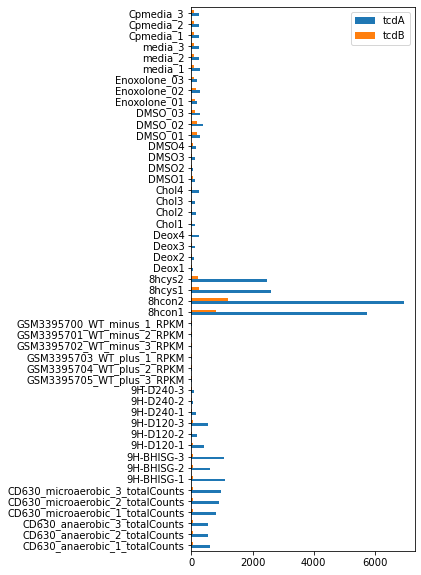

In [900]:
toxRPM[['tcdA','tcdB']].plot.barh(figsize=(4,10))

In [912]:
bins = toxRPM['tcdA'].quantile([0,0.25,0.75,1]).tolist()
labels = ['low','med','high']
toxRPM['tcdAbins'] = pd.cut(toxRPM['tcdA'], bins=bins, labels=labels)
toxRPM['tcdAbins']=toxRPM['tcdAbins'].fillna('low')

In [87]:
rpmMean.iloc[:,1:].astype(float).groupby(by = rpmMean.index).mean()

,tcdA,tcdB
name,,
BHIS + 120uM Deoxycholate,376.100047,34.661334
BHIS + 240uM Deoxycholate,91.905627,22.695561
BHIS + Calprotectin,240.017970,75.572779
BHIS - Microaerobic,883.680696,49.205531
BHIS-1,561.621542,43.688421
BHIS-2,929.771591,41.449801
BHIS-3,264.601288,74.006849
Cholate,156.432959,24.077338
DMSO-1,118.869964,30.081819


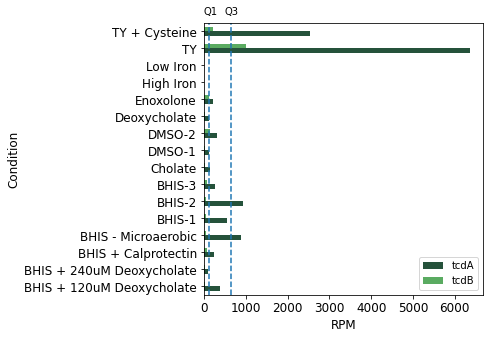

In [984]:
ax = rpmMean.plot.barh(figsize = (5,5), color = {'tcdA':'#25523b','tcdB':'#5aab61'}, fontsize=12)
ax.set_xlabel('RPM',fontsize=12)
ax.set_ylabel('Condition',fontsize=12);
ax.vlines(x = [124.84754830272487, 642.1363308420978], ymin = ax.get_ylim()[0], ymax = ax.get_ylim()[1], linestyles = 'dashed')
ax.annotate('Q1', (0, 16), annotation_clip = False)
ax.annotate('Q3', (500, 16), annotation_clip = False)
#plt.savefig('../figures/rpmToxins.jpeg',bbox_inches='tight', dpi = 600)

In [951]:
bins = rpmMean['tcdA'].quantile([0,0.25,0.75,1]).tolist()
labels = ['low','med','high']
rpmMean['tcdAbins'] = pd.cut(rpmMean['tcdA'], bins=bins, labels=labels)
rpmMean['tcdAbins']=rpmMean['tcdAbins'].fillna('low')

In [986]:
rpmMean['tcdAbins'].to_dict()

{'BHIS + 120uM Deoxycholate': 'med',
 'BHIS + 240uM Deoxycholate': 'low',
 'BHIS + Calprotectin': 'med',
 'BHIS - Microaerobic': 'high',
 'BHIS-1': 'med',
 'BHIS-2': 'high',
 'BHIS-3': 'med',
 'Cholate': 'med',
 'DMSO-1': 'low',
 'DMSO-2': 'med',
 'Deoxycholate': 'med',
 'Enoxolone': 'med',
 'High Iron': 'low',
 'Low Iron': 'low',
 'TY': 'high',
 'TY + Cysteine': 'high'}

### toxin transcript checkpoint

In [29]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [3]:
# Reload toxin transcript csv (mean RPM values from all studies)
rpmMean = pd.read_csv('../data/counts/toxTranscriptsMeanRPM.csv',index_col=0)

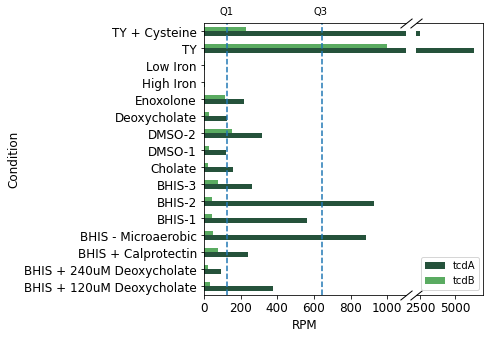

In [1047]:
f,ax = plt.subplots(1,2, figsize=(5,5),gridspec_kw={'width_ratios': [3, 1]})

ax1 = rpmMean.plot.barh( color = {'tcdA':'#25523b','tcdB':'#5aab61'}, fontsize=12, ax=ax[0])
ax[0].set_xlabel('RPM',fontsize=12)
ax[0].set_ylabel('Condition',fontsize=12);
ax[0].vlines(x = [124.84754830272487, 642.1363308420978], ymin = ax[0].get_ylim()[0], ymax = ax[0].get_ylim()[1], linestyles = 'dashed')
ax1.set_xlim(0,1100)
ax1.get_legend().remove()
ax[0].annotate('Q1', (85, 16), annotation_clip = False)
ax[0].annotate('Q3', (600, 16), annotation_clip = False)

ax2 = rpmMean.plot.barh( color = {'tcdA':'#25523b','tcdB':'#5aab61'}, fontsize=12, ax=ax[1])
ax2.set_xlim(2200,7000)
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.tick_params(axis='y', left = False, labelleft=False)
ax2.set_ylabel('')
ax2.legend(loc='best')

d = 0.8  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([1, 1], [1, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 0], [1, 0], transform=ax2.transAxes, **kwargs)

plt.subplots_adjust(wspace=0.075) 
#plt.savefig('../figures/rpmToxinsBroken.jpeg',bbox_inches='tight', dpi = 600)

#### Change categorization to binary low/high value based on median value
- Just plot TcdA values (sorted)

In [4]:
rpmMean['tcdA'].median()

252.309628895458

In [5]:
rpmMean

,tcdA,tcdB,strain,tcdAbins
name,,,,
High Iron,3.979694,2.216301,CD630,Low
Low Iron,5.241147,4.456899,CD630,Low
BHIS + 240uM Deoxycholate,91.905627,22.695561,CD630,Low
DMSO-1,118.869964,30.081819,CDR20291,Low
Deoxycholate,126.840076,29.247013,CDR20291,Low
Cholate,156.432959,24.077338,CDR20291,Low
Enoxolone,217.908163,115.143249,CDR20291,Low
BHIS + Calprotectin,240.017970,75.572779,CDR20291,Low
BHIS-3,264.601288,74.006849,CDR20291,High


In [7]:
condition_strain = {
    'High Iron':'CD630',
    'Low Iron':'CD630',
    'BHIS-1':'CD630',
    'BHIS - Microaerobic':'CD630',
    'BHIS-2':'CD630',
    'BHIS + 120uM Deoxycholate':'CD630',
    'BHIS + 240uM Deoxycholate':'CD630',
    'TY':'CDR20291',
    'TY + Cysteine':'CDR20291',
    'DMSO-1':'CDR20291',
    'Deoxycholate':'CDR20291',
    'Cholate':'CDR20291',
    'DMSO-2':'CDR20291',
    'Enoxolone':'CDR20291',
    'BHIS-3':'CDR20291',
    'BHIS + Calprotectin':'CDR20291'
}

In [12]:
# Column map (binary toxin labels)
strainDict={
    'CD630':'#d2a3d3',
    'CDR20291':'#955a98'
        }

rowNwk1 = pd.Series(condition_strain)
rowMap1 = pd.Series(rowNwk1).map(strainDict)

In [11]:
['#d2a3d3','#955a98']

High Iron                    #39675a
Low Iron                     #39675a
BHIS-1                       #39675a
BHIS - Microaerobic          #39675a
BHIS-2                       #39675a
BHIS + 120uM Deoxycholate    #39675a
BHIS + 240uM Deoxycholate    #39675a
TY                           #b4c3a8
TY + Cysteine                #b4c3a8
DMSO-1                       #b4c3a8
Deoxycholate                 #b4c3a8
Cholate                      #b4c3a8
DMSO-2                       #b4c3a8
Enoxolone                    #b4c3a8
BHIS-3                       #b4c3a8
BHIS + Calprotectin          #b4c3a8
dtype: object

In [20]:
strainDict['CD630']

'#d2a3d3'

In [25]:
colorList = [strainDict[x] for x in rpmMean['strain']]

/var/folders/85/n42jk96d3hsbdfcjbr1qlmb80000gp/T/ipykernel_1579/2220436782.py:23: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  x = mpatches.Patch(0,0,color=strainDict[label], label=label)


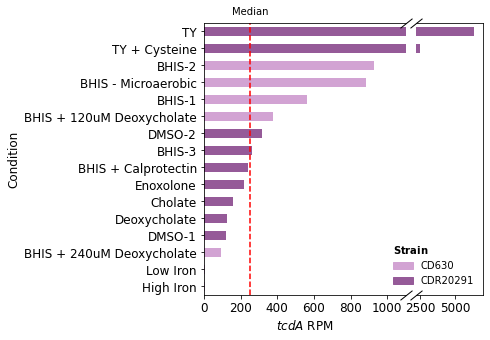

In [54]:
f,ax = plt.subplots(1,2, figsize=(5,5),gridspec_kw={'width_ratios': [3, 1]})

ax1 = rpmMean['tcdA'].plot.barh( color = colorList, fontsize=12, ax=ax[0]) #00b3b3 (teal) #5aab61 (green)
ax[0].set_xlabel('$tcdA$ RPM',fontsize=12)
ax[0].set_ylabel('Condition',fontsize=12);
ax[0].vlines(x = [252.309628895458], ymin = ax[0].get_ylim()[0], ymax = ax[0].get_ylim()[1], linestyles = 'dashed', color = 'red')
ax1.set_xlim(0,1100)
#ax1.get_legend().remove()
ax[0].annotate('Median', (155, 16), annotation_clip = False)


ax2 = rpmMean['tcdA'].plot.barh( color = colorList, fontsize=12, ax=ax[1])
ax2.set_xlim(2200,7000)
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.tick_params(axis='y', left = False, labelleft=False)
ax2.set_ylabel('')
#ax2.legend(loc='best')

#Set legend for strain-colored figure version:
strainLeg = []
for label in strainDict:
    x = mpatches.Patch(0,0,color=strainDict[label], label=label)
    strainLeg.append(x)
ax2.legend(handles = strainLeg, loc='lower right', frameon=False, title = '$\\bf{Strain}$')._legend_box.align = "left"

#
d = 0.8  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([1, 1], [1, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 0], [1, 0], transform=ax2.transAxes, **kwargs)

plt.subplots_adjust(wspace=0.075) 
#plt.savefig('../figures/rpmToxinsBroken4.jpeg',bbox_inches='tight', dpi = 600)

In [42]:
l1[1]

['tcdA']

In [142]:
rpmMean['tcdAbins'].to_dict()

{'High Iron': 'Low',
 'Low Iron': 'Low',
 'BHIS + 240uM Deoxycholate': 'Low',
 'DMSO-1': 'Low',
 'Deoxycholate': 'Low',
 'Cholate': 'Low',
 'Enoxolone': 'Low',
 'BHIS + Calprotectin': 'Low',
 'BHIS-3': 'High',
 'DMSO-2': 'High',
 'BHIS + 120uM Deoxycholate': 'High',
 'BHIS-1': 'High',
 'BHIS - Microaerobic': 'High',
 'BHIS-2': 'High',
 'TY + Cysteine': 'High',
 'TY': 'High'}

### Normalized toxin transcripts

In [718]:
# Rename columns in r20291 toxin genes df and join with r630tox df
r630tox['strain'] = 'CD630'
r20291tox['strain']='CDR20291'
toxdf = pd.concat([r630tox, r20291tox.rename(columns=refLocus2_nameDict)])

In [727]:
# Save toxin df
toxdf.loc[:,toxdf.columns!='strain'].max().max()
toxdf.loc[:,toxdf.columns!='strain'].min().min()

0.0

In [903]:
toxdf['name'] = ''
for x in names:
    toxdf.loc[x, ['name']] = str(names[x])

<AxesSubplot:>

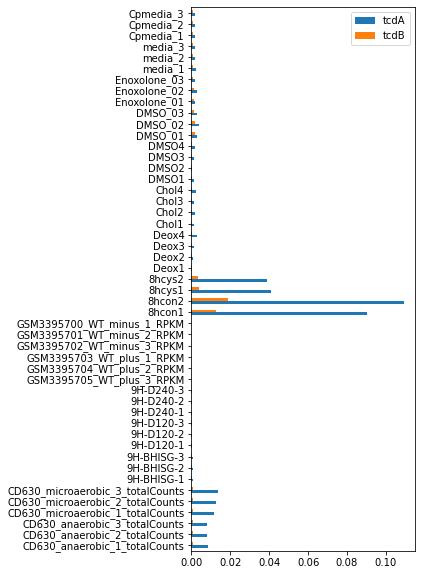

In [840]:
toxdf[['tcdA','tcdB']].plot.barh(figsize=(4,10))

In [773]:
normtox = toxdf.loc[:,toxdf.columns!='strain']

In [774]:
normtox = (normtox-normtox.min().min())/(normtox.max().max()-normtox.min().min())

In [841]:
rpm.head()

,CD630_06590,CD630_06600,CD630_06610,CD630_06630,CD630_06640
GSM3395705_WT_plus_3_RPKM,0.0,0.000004,0.0,0.000008,0.000022
GSM3395704_WT_plus_2_RPKM,0.0,0.000003,0.0,0.000003,0.000019
GSM3395703_WT_plus_1_RPKM,0.0,0.000003,0.0,0.000006,0.000025
GSM3395702_WT_minus_3_RPKM,0.0,0.000006,0.000001,0.000011,0.000057
GSM3395701_WT_minus_2_RPKM,0.0,0.000007,0.000001,0.000007,0.000044


In [747]:
normtox['tcdB'].max()

0.1709409577112138

In [757]:
normtox['tcdA'].quantile([0,0.25,0.75,1]).tolist()

[3.1470641038574824e-05, 0.0046063503106779456, 0.027727146169523955, 1.0]

In [745]:
normtox['tcdB'].quantile([0,0.25,0.75,1]).tolist()

[2.7154680163669887e-05,
 0.00035206049071029544,
 0.0061033606665889025,
 0.1709409577112138]

In [775]:
bins = normtox['tcdA'].quantile([0,0.25,0.75,1]).tolist()
labels = ['low','med','high']
normtox['tcdAbins'] = pd.cut(normtox['tcdA'], bins=bins, labels=labels)
normtox['tcdAbins']=normtox['tcdAbins'].fillna('low')

In [777]:
bins = normtox['tcdB'].quantile([0,0.25,0.75,1]).tolist()
labels = ['low','med','high']
normtox['tcdBbins']=pd.cut(normtox['tcdB'], bins=bins, labels=labels)
normtox['tcdBbins'].fillna('low')
normtox['tcdBbins']=normtox['tcdBbins'].fillna('low')

In [ ]:
'High Iron', 'Low Iron', 'BHIS-1', 'BHIS - Microaerobic', 'BHIS-2',
       'BHIS + 120uM Deoxycholate', 'BHIS + 240uM Deoxycholate', 'TY',
       'TY + Cysteine', 'DMSO-1', 'Deoxycholate', 'Cholate', 'DMSO-2',
       'Enoxolone', 'BHIS-3', 'BHIS + Calprotectin'

In [781]:
full = ['BHIS-1','BHIS-1','BHIS-1','BHIS - Microaerobic','BHIS - Microaerobic','BHIS - Microaerobic','BHIS-2','BHIS-2','BHIS-2',
'BHIS + 120uM Deoxycholate','BHIS + 120uM Deoxycholate','BHIS + 120uM Deoxycholate','BHIS + 240uM Deoxycholate','BHIS + 240uM Deoxycholate','BHIS + 240uM Deoxycholate',
'High Iron','High Iron','High Iron','Low Iron','Low Iron','Low Iron','TY','TY','TY + Cysteine', 'TY + Cysteine','Deoxycholate','Deoxycholate','Deoxycholate','Deoxycholate',
'Cholate','Cholate','Cholate','Cholate','DMSO-1','DMSO-1','DMSO-1','DMSO-1','DMSO-2','DMSO-2','DMSO-2','Enoxolone','Enoxolone','Enoxolone','BHIS-3','BHIS-3','BHIS-3',
'BHIS + Calprotectin','BHIS + Calprotectin','BHIS + Calprotectin']

In [77]:
toxRPM.index

Index(['CD630_anaerobic_1_totalCounts', 'CD630_anaerobic_2_totalCounts',
       'CD630_anaerobic_3_totalCounts', 'CD630_microaerobic_1_totalCounts',
       'CD630_microaerobic_2_totalCounts', 'CD630_microaerobic_3_totalCounts',
       '9H-BHISG-1', '9H-BHISG-2', '9H-BHISG-3', '9H-D120-1', '9H-D120-2',
       '9H-D120-3', '9H-D240-1', '9H-D240-2', '9H-D240-3',
       'GSM3395705_WT_plus_3_RPKM', 'GSM3395704_WT_plus_2_RPKM',
       'GSM3395703_WT_plus_1_RPKM', 'GSM3395702_WT_minus_3_RPKM',
       'GSM3395701_WT_minus_2_RPKM', 'GSM3395700_WT_minus_1_RPKM', '8hcon1',
       '8hcon2', '8hcys1', '8hcys2', 'Deox1', 'Deox2', 'Deox3', 'Deox4',
       'Chol1', 'Chol2', 'Chol3', 'Chol4', 'DMSO1', 'DMSO2', 'DMSO3', 'DMSO4',
       'DMSO_01', 'DMSO_02', 'DMSO_03', 'Enoxolone_01', 'Enoxolone_02',
       'Enoxolone_03', 'media_1', 'media_2', 'media_3', 'Cpmedia_1',
       'Cpmedia_2', 'Cpmedia_3'],
      dtype='object')

In [787]:
names = dict(zip(normtox.index.tolist(),full))

In [800]:
normtox['name'] = ''
for x in names:
    normtox.loc[x, ['name']] = str(names[x])

In [821]:
adf = normtox[['name','tcdA']].set_index('name')

In [828]:
import numpy as np

In [834]:
adf.astype(float).groupby(by=adf.index).median().to_dict()

{'tcdA': {'BHIS + 120uM Deoxycholate': 0.003241456352338572,
  'BHIS + 240uM Deoxycholate': 0.0006568397222038723,
  'BHIS + Calprotectin': 0.016705833246931114,
  'BHIS - Microaerobic': 0.1160760638504704,
  'BHIS-1': 0.07131653771711632,
  'BHIS-2': 0.008712740089579925,
  'BHIS-3': 0.018591399848184594,
  'Cholate': 0.013151356016710539,
  'DMSO-1': 0.012521515141907564,
  'DMSO-2': 0.027727146169523955,
  'Deoxycholate': 0.009771446645043473,
  'Enoxolone': 0.018985560192113084,
  'High Iron': 5.482708719231936e-05,
  'Low Iron': 6.403706808247642e-05,
  'TY': 0.9137983251882865,
  'TY + Cysteine': 0.3643831842895301}}

In [831]:
np.log2(adf.astype(float).groupby(by=adf.index).median())

,tcdA
name,
BHIS + 120uM Deoxycholate,-8.269142
BHIS + 240uM Deoxycholate,-10.572171
BHIS + Calprotectin,-5.903504
BHIS - Microaerobic,-3.106858
BHIS-1,-3.809620
BHIS-2,-6.842658
BHIS-3,-5.749221
Cholate,-6.248645
DMSO-1,-6.319447


In [818]:
normtox['tcdA'].astype(float)

CD630_anaerobic_1_totalCounts       0.077259
CD630_anaerobic_2_totalCounts       0.071317
CD630_anaerobic_3_totalCounts       0.071124
CD630_microaerobic_1_totalCounts    0.104784
CD630_microaerobic_2_totalCounts    0.116076
CD630_microaerobic_3_totalCounts    0.124824
9H-BHISG-1                          0.009124
9H-BHISG-2                          0.005025
9H-BHISG-3                          0.008713
9H-D120-1                           0.003241
9H-D120-2                           0.001518
9H-D120-3                           0.004488
9H-D240-1                           0.001245
9H-D240-2                           0.000358
9H-D240-3                           0.000657
GSM3395705_WT_plus_3_RPKM           0.000075
GSM3395704_WT_plus_2_RPKM           0.000031
GSM3395703_WT_plus_1_RPKM           0.000055
GSM3395702_WT_minus_3_RPKM          0.000098
GSM3395701_WT_minus_2_RPKM          0.000064
GSM3395700_WT_minus_1_RPKM          0.000050
8hcon1                              0.827597
8hcon2    

In [817]:
normtox.groupby(by='name')['tcdA'].astype(float).median()

AttributeError: 'SeriesGroupBy' object has no attribute 'astype'

In [780]:
toxin_dict={
    rip_hife:'Low',
    rip_lofe:'Low',
    rip_anaero:'High',
    rip_microaer:'High',
    rip_bhis:'Medium',
    rip_d120:'Low',
    rip_d240:'Low',
    rip_ty:'High',
    rip_tycys:'High',
    rip_dmso:'Medium',
    rip_dca:'Medium',
    rip_cho:'Medium',
    rip_dmso1:'Medium',
    rip_enox:'Medium',
    rip_bhisr:'Medium',
    rip_cal:'Medium'
}

NameError: name 'rip_hife' is not defined